In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

In [2]:
ds_ch = pd.read_csv('./Downloads/week4day1/통신고객이탈.csv',engine='python')
ds_ch.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [4]:
ds_ch.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [5]:
ds_ch["CHURN"].replace(to_replace = "Active", value=0, inplace=True)
ds_ch["CHURN"].replace(to_replace = "Churned", value=1, inplace=True)

In [7]:
ds_ch_dummy=pd.get_dummies(ds_ch)
ds_ch_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
np.random.seed(seed=123)
msk=np.random.rand(ds_ch_dummy.shape[0]) <0.7
ds_ch_train=ds_ch_dummy[msk]
ds_ch_test=ds_ch_dummy[~msk]

ds_ch_train_y=ds_ch_train["CHURN"]
ds_ch_train_x=ds_ch_train.drop("CHURN", axis=1, inplace=False)
ds_ch_test_y=ds_ch_test["CHURN"]
ds_ch_test_x=ds_ch_test.drop("CHURN", axis=1, inplace=False)

In [17]:
knn_uncustomized=KNeighborsClassifier()
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
knn_uncustomized.fit(ds_ch_train_x,ds_ch_train_y)
y_pred=knn_uncustomized.predict(ds_ch_test_x)
print("predict test set:{}".format(y_pred.tolist()[:10]))
print("test set label:{}".format(ds_ch_test_y.tolist()[:10]))
print("accuracy:{0:.3f}".format(knn_uncustomized.score(ds_ch_test_x,ds_ch_test_y)))

predict test set:[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
test set label:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
accuracy:0.818


In [20]:
max_n_neighbors=10
para_n_neighbors=[i+1 for i in range(max_n_neighbors)]
train_accuracy=[]
test_accuracy=[]

for n_neighbors in para_n_neighbors:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(ds_ch_train_x, ds_ch_train_y)
    train_accuracy.append(clf.score(ds_ch_train_x,ds_ch_train_y))
    test_accuracy.append(clf.score(ds_ch_test_x,ds_ch_test_y))
    
ds_neighbors=pd.DataFrame()
ds_neighbors["Neighbors"]=para_n_neighbors
ds_neighbors["TrainAccuracy"]=train_accuracy
ds_neighbors["TestAccuracy"]=test_accuracy
ds_neighbors

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000000,0.770909
1,2,0.853435,0.825455
2,3,0.844275,0.818182
3,4,0.812214,0.818182
4,5,0.812214,0.818182
5,6,0.804580,0.821818
6,7,0.810687,0.829091
7,8,0.806107,0.821818
8,9,0.807634,0.829091
9,10,0.809160,0.818182


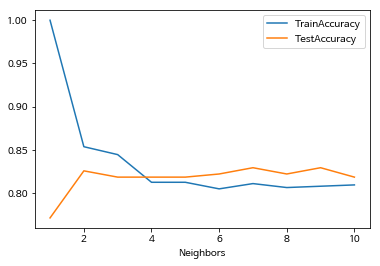

In [21]:
ds_neighbors.set_index("Neighbors", inplace=False).plot()

In [22]:
max_n_neighbors=10
para_n_neighbors=[i+1 for i in range(max_n_neighbors)] * 2
para_weights=["uniform"]*max_n_neighbors+["distance"]*max_n_neighbors
train_accuracy=[]
test_accuracy=[]

for (n_neighbors, weights) in zip(para_n_neighbors, para_weights):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights)
    clf.fit(ds_ch_train_x, ds_ch_train_y)
    train_accuracy.append(clf.score(ds_ch_train_x,ds_ch_train_y))
    test_accuracy.append(clf.score(ds_ch_test_x,ds_ch_test_y))
    
ds_neighbors_weight=pd.DataFrame()
ds_neighbors_weight["Neighbors"]=para_n_neighbors
ds_neighbors_weight["Weights"]=para_weights
ds_neighbors_weight["TrainAccuracy"]=train_accuracy
ds_neighbors_weight["TestAccuracy"]=test_accuracy
ds_neighbors_weight

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000000,0.770909
1,2,uniform,0.853435,0.825455
2,3,uniform,0.844275,0.818182
3,4,uniform,0.812214,0.818182
4,5,uniform,0.812214,0.818182
5,6,uniform,0.804580,0.821818
6,7,uniform,0.810687,0.829091
7,8,uniform,0.806107,0.821818
8,9,uniform,0.807634,0.829091
9,10,uniform,0.809160,0.818182


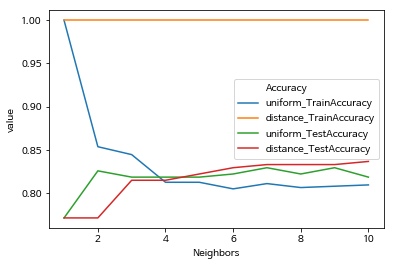

In [23]:
ds_neighbors_weight_melt=pd.melt(ds_neighbors_weight,id_vars=["Neighbors","Weights"])
ds_neighbors_weight_melt["Accuracy"]=ds_neighbors_weight_melt["Weights"]+"_"+ds_neighbors_weight_melt["variable"]
ax=sns.lineplot(x="Neighbors",y="value",hue="Accuracy",data=ds_neighbors_weight_melt)

In [24]:
max_n_neighbors=10
para_n_neighbors=[i+1 for i in range(max_n_neighbors)] * 3
para_algorithm=["ball_tree"]*max_n_neighbors+["kd_tree"]*max_n_neighbors+["brute"]*max_n_neighbors
train_accuracy=[]
test_accuracy=[]

for (n_neighbors, algorithm) in zip(para_n_neighbors, para_algorithm):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors,weights="uniform",algorithm=algorithm)
    clf.fit(ds_ch_train_x, ds_ch_train_y)
    train_accuracy.append(clf.score(ds_ch_train_x,ds_ch_train_y))
    test_accuracy.append(clf.score(ds_ch_test_x,ds_ch_test_y))
    
ds_neighbors_algorithm=pd.DataFrame()
ds_neighbors_algorithm["Neighbors"]=para_n_neighbors
ds_neighbors_algorithm["Algorithm"]=para_algorithm
ds_neighbors_algorithm["TrainAccuracy"]=train_accuracy
ds_neighbors_algorithm["TestAccuracy"]=test_accuracy
ds_neighbors_algorithm

,Neighbors,Algorithm,TrainAccuracy,TestAccuracy
0,1,ball_tree,1.000000,0.770909
1,2,ball_tree,0.853435,0.825455
2,3,ball_tree,0.844275,0.818182
3,4,ball_tree,0.812214,0.818182
4,5,ball_tree,0.812214,0.818182
5,6,ball_tree,0.804580,0.821818
6,7,ball_tree,0.810687,0.829091
7,8,ball_tree,0.806107,0.821818
8,9,ball_tree,0.807634,0.829091
9,10,ball_tree,0.809160,0.818182


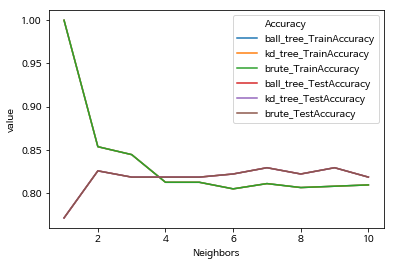

In [25]:
ds_neighbors_algorithm_melt=pd.melt(ds_neighbors_algorithm,id_vars=["Neighbors","Algorithm"])
ds_neighbors_algorithm_melt["Accuracy"]=ds_neighbors_algorithm_melt["Algorithm"]+"_"+ds_neighbors_algorithm_melt["variable"]
ax=sns.lineplot(x="Neighbors",y="value",hue="Accuracy",data=ds_neighbors_algorithm_melt)

In [26]:
max_n_neighbors=10
para_n_neighbors=[i+1 for i in range(max_n_neighbors)] * 3
para_metric=["minkowski"]*max_n_neighbors+["euclidean"]*max_n_neighbors+["manhattan"]*max_n_neighbors
train_accuracy=[]
test_accuracy=[]

for (n_neighbors, metric) in zip(para_n_neighbors, para_metric):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors,weights="uniform",algorithm="ball_tree",metric=metric)
    clf.fit(ds_ch_train_x, ds_ch_train_y)
    train_accuracy.append(clf.score(ds_ch_train_x,ds_ch_train_y))
    test_accuracy.append(clf.score(ds_ch_test_x,ds_ch_test_y))
    
ds_neighbors_metric=pd.DataFrame()
ds_neighbors_metric["Neighbors"]=para_n_neighbors
ds_neighbors_metric["Metric"]=para_metric
ds_neighbors_metric["TrainAccuracy"]=train_accuracy
ds_neighbors_metric["TestAccuracy"]=test_accuracy
ds_neighbors_metric

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000000,0.770909
1,2,minkowski,0.853435,0.825455
2,3,minkowski,0.844275,0.818182
3,4,minkowski,0.812214,0.818182
4,5,minkowski,0.812214,0.818182
5,6,minkowski,0.804580,0.821818
6,7,minkowski,0.810687,0.829091
7,8,minkowski,0.806107,0.821818
8,9,minkowski,0.807634,0.829091
9,10,minkowski,0.809160,0.818182


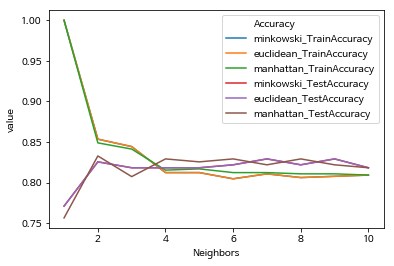

In [27]:
ds_neighbors_metric_melt=pd.melt(ds_neighbors_metric,id_vars=["Neighbors","Metric"])
ds_neighbors_metric_melt["Accuracy"]=ds_neighbors_metric_melt["Metric"]+"_"+ds_neighbors_metric_melt["variable"]
ax=sns.lineplot(x="Neighbors",y="value",hue="Accuracy",data=ds_neighbors_metric_melt)

In [28]:
clf_model=KNeighborsClassifier(n_neighbors=4,weights="uniform",algorithm="ball_tree",metric="euclidean")
clf_model.fit(ds_ch_train_x,ds_ch_train_y)
print("train data accuracy:{0:.3f}".format(clf_model.score(ds_ch_train_x,ds_ch_train_y)))
print("test data accuracy:{0:.3f}".format(clf_model.score(ds_ch_test_x,ds_ch_test_y)))

train data accuracy:0.812
test data accuracy:0.818
